In [77]:
import polars as pl

# Read the parquet file
df_consolidado = pl.read_parquet("../data/consolidado/df_consolidado.parquet")

# Show first 5 rows
df_consolidado.head()


CODIGO_ANONIMIZADO,SEXO,EDAD,FECHA_NACIMIENTO,FECHA_FALLECIMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,NIVEL_ESTABLECIMIENTO_PRINCIPAL,TOTAL_DIAS_HOSPITALIZACION,TOTAL_GASTO_MEDICAMENTOS,TOTAL_ATENCIONES,ULTIMA_ATENCION,FALLECIDO,TIENE_DIABETES,HOSPITALIZADO_ALGUNA_VEZ,TIPO_DIABETES_PRINCIPAL,PRINCIPAL_CODIGO_CONSUMO,PRINCIPAL_NOMBRE_CONSUMO,FECHA_NACIMIENTO_DATE,ANIO_NAC,GRUPO_ETARIO
str,str,i64,datetime[μs],datetime[μs],i64,str,str,str,i64,i64,f64,u32,datetime[μs],i8,i8,i8,str,i64,str,date,i32,str
"""000015CA7003D37272A17DE250F6AF…","""MASCULINO""",73,1948-09-24 00:00:00,null,70101,"""CALLAO""","""PROV. CONST. DEL CALLAO""","""CALLAO""",1,0,5.4,36,2022-04-13 00:00:00,0,1,0,"""DIABETES MELLITUS TIPO 2""",4696,"""METFORMINA CLORHIDRATO""",1948-09-24,1948,"""Adulto mayor"""
"""0000F157F4A508199E7AB5BC2C578C…","""FEMENINO""",62,1960-04-19 00:00:00,null,150112,"""LIMA""","""LIMA""","""INDEPENDENCIA""",1,0,0.0,42,2022-05-19 00:00:00,0,1,0,"""DIABETES MELLITUS TIPO 2""",4034,"""IBUPROFENO""",1960-04-19,1960,"""Adulto"""
"""000108D3721EF356AB8A6AB2A8B8BF…","""FEMENINO""",69,1952-12-20 00:00:00,2022-08-05 00:00:00,120701,"""JUNÃN""","""TARMA""","""TARMA""",2,0,10.1,23,2022-06-16 00:00:00,1,1,0,"""DIABETES MELLITUS TIPO 2""",3718,"""GABAPENTINA""",1952-12-20,1952,"""Adulto mayor"""
"""00011E4AD59AA9D1B25078C9508FF0…","""FEMENINO""",31,1991-01-31 00:00:00,null,150507,"""LIMA""","""CAÃETE""","""IMPERIAL""",1,0,0.0,11,2022-08-11 00:00:00,0,1,0,"""DIABETES MELLITUS TIPO 2""",4034,"""IBUPROFENO""",1991-01-31,1991,"""Joven-adulto"""
"""000138461C3A7C68629B8C5ADAA075…","""MASCULINO""",64,1957-10-07 00:00:00,null,150103,"""LIMA""","""LIMA""","""ATE""",1,0,1.2,7,2022-02-10 00:00:00,0,1,0,"""DIABETES MELLITUS NO ESPECIFIC…",4696,"""METFORMINA CLORHIDRATO""",1957-10-07,1957,"""Adulto"""


In [78]:
import polars as pl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Cargar datos (ejemplo)
# df = pl.read_csv("datos_diabetes.csv")

# Seleccionar variables relevantes
features = [
    "SEXO", "EDAD", "TOTAL_DIAS_HOSPITALIZACION", 
    "TOTAL_GASTO_MEDICAMENTOS", "TOTAL_ATENCIONES",
    "HOSPITALIZADO_ALGUNA_VEZ", "TIPO_DIABETES_PRINCIPAL", 
    "GRUPO_ETARIO"
]

target = "FALLECIDO"

# Filtrar y limpiar
df_modelo = df_consolidado.select([*features, target]).drop_nulls()

In [79]:
# Convertir a Pandas para procesamiento
df_pd = df_modelo.to_pandas()

# Definir preprocesamiento
categorical_cols = ["SEXO", "TIPO_DIABETES_PRINCIPAL", "GRUPO_ETARIO"]
numeric_cols = ["EDAD", "TOTAL_DIAS_HOSPITALIZACION", "TOTAL_GASTO_MEDICAMENTOS", "TOTAL_ATENCIONES"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

In [80]:
# Dividir datos
X = df_pd[features]
y = df_pd[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocesar y entrenar
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_processed, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [81]:
# Predecir
y_pred = model.predict(X_test_processed)
y_proba = model.predict_proba(X_test_processed)[:, 1]

# Métricas
print(classification_report(y_test, y_pred))
print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.2f}")

              precision    recall  f1-score   support

           0       0.95      0.98      0.96    107534
           1       0.31      0.16      0.21      6926

    accuracy                           0.93    114460
   macro avg       0.63      0.57      0.59    114460
weighted avg       0.91      0.93      0.92    114460

AUC-ROC: 0.81


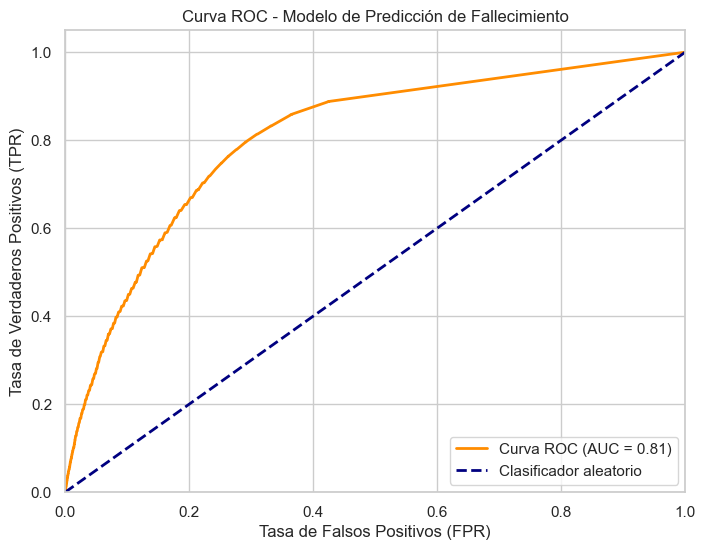

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular métricas ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Crear gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Modelo de Predicción de Fallecimiento')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# SMOTE

In [83]:
pip install --upgrade --force-reinstall imbalanced-learn


  Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
  Using cached numpy-2.3.2-cp311-cp311-win_amd64.whl (13.1 MB)
  Using cached scipy-1.16.1-cp311-cp311-win_amd64.whl (38.6 MB)
  Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl (8.9 MB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)
  Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Attempting u

ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\quine\\Documents\\repos_github\\Dataton_CONOVATEC\\venv\\Lib\\site-packages\\~-learn\\.libs\\msvcp140.dll'
Check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
import polars as pl
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Cargar datos (ejemplo)
# df_consolidado = pl.read_csv("tu_archivo.csv")

# Seleccionar variables relevantes
features = [
    "SEXO", "EDAD", "TOTAL_DIAS_HOSPITALIZACION", 
    "TOTAL_GASTO_MEDICAMENTOS", "TOTAL_ATENCIONES",
    "HOSPITALIZADO_ALGUNA_VEZ", "TIPO_DIABETES_PRINCIPAL", 
    "GRUPO_ETARIO"
]
target = "FALLECIDO"

# Convertir a Pandas para SMOTE (imblearn funciona con Pandas/NumPy)
df_pd = df_consolidado.select([*features, target]).to_pandas()

# Preprocesamiento: Codificar variables categóricas
categorical_cols = ["SEXO", "TIPO_DIABETES_PRINCIPAL", "GRUPO_ETARIO"]
numeric_cols = ["EDAD", "TOTAL_DIAS_HOSPITALIZACION", "TOTAL_GASTO_MEDICAMENTOS", "TOTAL_ATENCIONES"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Aplicar preprocesamiento
X = df_pd[features]
y = df_pd[target]
X_processed = preprocessor.fit_transform(X)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

# Verificar balanceo
print("Distribución original:", y.value_counts())
print("Distribución después de SMOTE:", pd.Series(y_resampled).value_counts())

Distribución original: FALLECIDO
0    358413
1     23118
Name: count, dtype: int64
Distribución después de SMOTE: FALLECIDO
0    358413
1    358413
Name: count, dtype: int64


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Dividir datos balanceados
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluar
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    107380
           1       0.97      0.94      0.95    107668

    accuracy                           0.96    215048
   macro avg       0.96      0.96      0.96    215048
weighted avg       0.96      0.96      0.96    215048



In [86]:
import polars as pl

# Ordenar primero por TOTAL_DIAS_HOSPITALIZACION descendente, luego por VALOR_NETO descendente
df_consolidado = df_consolidado.sort(
    by=["TOTAL_GASTO_MEDICAMENTOS"],
    descending=[True]
)

# Mostrar los primeros registros ordenados
df_consolidado.head(10)


CODIGO_ANONIMIZADO,SEXO,EDAD,FECHA_NACIMIENTO,FECHA_FALLECIMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,NIVEL_ESTABLECIMIENTO_PRINCIPAL,TOTAL_DIAS_HOSPITALIZACION,TOTAL_GASTO_MEDICAMENTOS,TOTAL_ATENCIONES,ULTIMA_ATENCION,FALLECIDO,TIENE_DIABETES,HOSPITALIZADO_ALGUNA_VEZ,TIPO_DIABETES_PRINCIPAL,PRINCIPAL_CODIGO_CONSUMO,PRINCIPAL_NOMBRE_CONSUMO,FECHA_NACIMIENTO_DATE,ANIO_NAC,GRUPO_ETARIO
str,str,i64,datetime[μs],datetime[μs],i64,str,str,str,i64,i64,f64,u32,datetime[μs],i8,i8,i8,str,i64,str,date,i32,str
"""B46CA9ACFDD5E91A74A2095D67305C…","""MASCULINO""",54,1968-01-30 00:00:00,null,150141,"""LIMA""","""LIMA""","""SURQUILLO""",3,15146,26864.423,587,2023-01-20 00:00:00,0,1,1,"""DIABETES MELLITUS NO ESPECIFIC…",143,"""ACICLOVIR""",1968-01-30,1968,"""Adulto"""
"""FF96A6D9E738ADAFEBB4EB644FBA33…","""MASCULINO""",23,2000-01-26 00:00:00,2023-03-25 00:00:00,220901,"""SAN MARTÃN""","""SAN MARTÃN""","""TARAPOTO""",2,14552,24750.055,734,2023-03-25 00:00:00,1,1,1,"""DIABETES MELLITUS TIPO 2""",8140,"""OXIGENO MEDICINAL""",2000-01-26,2000,"""Joven-adulto"""
"""B643E1B5DCE1FE7B1623060AB3133F…","""FEMENINO""",68,1954-07-08 00:00:00,2023-05-30 00:00:00,120201,"""JUNÃN""","""CONCEPCIÃN""","""CONCEPCIÃN""",2,8411,23561.815,1306,2023-05-30 00:00:00,1,1,1,"""DIABETES MELLITUS TIPO 2""",41434,"""OXIGENO MEDICINAL""",1954-07-08,1954,"""Adulto mayor"""
"""298077BC71D12C3BB2AD35AFA66056…","""FEMENINO""",67,1955-11-02 00:00:00,null,220901,"""SAN MARTÃN""","""SAN MARTÃN""","""TARAPOTO""",2,7827,21553.705,1189,2023-04-04 00:00:00,0,1,1,"""DIABETES MELLITUS NO ESPECIFIC…",8140,"""OXIGENO MEDICINAL""",1955-11-02,1955,"""Adulto mayor"""
"""9452D4F1E9FABB47E76109EA389199…","""FEMENINO""",62,1961-07-01 00:00:00,2023-07-07 00:00:00,150142,"""LIMA""","""LIMA""","""VILLA EL SALVADOR""",2,15086,20696.02,823,2023-07-07 00:00:00,1,1,1,"""DIABETES MELLITUS TIPO 2""",22291,"""OXIGENO MEDICINAL""",1961-07-01,1961,"""Adulto"""
"""1C5A64A2DDD4A8BF2A124E6434CBDB…","""FEMENINO""",46,1976-11-09 00:00:00,2022-12-27 00:00:00,160201,"""LORETO""","""ALTO AMAZONAS""","""YURIMAGUAS""",2,9136,19622.6035,1117,2022-12-27 00:00:00,1,1,1,"""DIABETES MELLITUS TIPO 1""",8140,"""OXIGENO MEDICINAL""",1976-11-09,1976,"""Adulto"""
"""71AB1A61E259C022DA3F96FC5B9DC3…","""FEMENINO""",69,1954-06-11 00:00:00,2023-08-06 00:00:00,50101,"""AYACUCHO""","""HUAMANGA""","""AYACUCHO""",2,6911,18303.136,1604,2023-08-05 00:00:00,1,1,1,"""DIABETES MELLITUS TIPO 1""",22291,"""OXIGENO MEDICINAL""",1954-06-11,1954,"""Adulto mayor"""
"""3453A76A399064C26AFF188A4BB142…","""MASCULINO""",17,2005-08-08 00:00:00,2024-01-23 00:00:00,150130,"""LIMA""","""LIMA""","""SAN BORJA""",3,6341,18130.993,463,2023-02-16 00:00:00,1,1,1,"""DIABETES MELLITUS TIPO 2""",11368,"""JERINGA DESCARTABLE 10 mL CON …",2005-08-08,2005,"""Menor de edad"""
"""42DD17C602C032DFBC9CBEB7FD7FD5…","""FEMENINO""",48,1974-05-14 00:00:00,2022-10-19 00:00:00,50101,"""AYACUCHO""","""HUAMANGA""","""AYACUCHO""",2,11136,17792.443,740,2022-10-12 00:00:00,1,1,1,"""OTRAS DIABETES MELLITUS ESPECI…",22291,"""OXIGENO MEDICINAL""",1974-05-14,1974,"""Adulto"""


In [87]:
import polars as pl

# Filtrar registros con TOTAL_GASTO_MEDICAMENTOS < 1000
df_consolidado = df_consolidado.filter(
    pl.col("TOTAL_GASTO_MEDICAMENTOS") < 1000
)

# Ordenar por TOTAL_GASTO_MEDICAMENTOS descendente
df_consolidado = df_consolidado.sort(
    by=["TOTAL_GASTO_MEDICAMENTOS"],
    descending=[True]
)

# Mostrar los primeros registros ordenados
print(df_consolidado.head(10))


shape: (10, 23)
┌────────────┬───────────┬──────┬────────────┬───┬────────────┬────────────┬──────────┬────────────┐
│ CODIGO_ANO ┆ SEXO      ┆ EDAD ┆ FECHA_NACI ┆ … ┆ PRINCIPAL_ ┆ FECHA_NACI ┆ ANIO_NAC ┆ GRUPO_ETAR │
│ NIMIZADO   ┆ ---       ┆ ---  ┆ MIENTO     ┆   ┆ NOMBRE_CON ┆ MIENTO_DAT ┆ ---      ┆ IO         │
│ ---        ┆ str       ┆ i64  ┆ ---        ┆   ┆ SUMO       ┆ E          ┆ i32      ┆ ---        │
│ str        ┆           ┆      ┆ datetime[μ ┆   ┆ ---        ┆ ---        ┆          ┆ str        │
│            ┆           ┆      ┆ s]         ┆   ┆ str        ┆ date       ┆          ┆            │
╞════════════╪═══════════╪══════╪════════════╪═══╪════════════╪════════════╪══════════╪════════════╡
│ 0F380CBD1C ┆ MASCULINO ┆ 53   ┆ 1968-05-22 ┆ … ┆ JERINGA    ┆ 1968-05-22 ┆ 1968     ┆ Adulto     │
│ C2668AFFCA ┆           ┆      ┆ 00:00:00   ┆   ┆ DESCARTABL ┆            ┆          ┆            │
│ 232BD8A821 ┆           ┆      ┆            ┆   ┆ E 20 mL    ┆            

In [88]:
import polars as pl

# Filtrar para eliminar los registros con más de 200 días de hospitalización
df_consolidado = df_consolidado.filter(
    pl.col("TOTAL_DIAS_HOSPITALIZACION") <= 200
)

# Ordenar por TOTAL_DIAS_HOSPITALIZACION de forma descendente
df_consolidado = df_consolidado.sort("TOTAL_DIAS_HOSPITALIZACION", descending=True)

# Mostrar los primeros registros ordenados
print(df_consolidado.head(10))


shape: (10, 23)
┌────────────┬───────────┬──────┬────────────┬───┬────────────┬────────────┬──────────┬────────────┐
│ CODIGO_ANO ┆ SEXO      ┆ EDAD ┆ FECHA_NACI ┆ … ┆ PRINCIPAL_ ┆ FECHA_NACI ┆ ANIO_NAC ┆ GRUPO_ETAR │
│ NIMIZADO   ┆ ---       ┆ ---  ┆ MIENTO     ┆   ┆ NOMBRE_CON ┆ MIENTO_DAT ┆ ---      ┆ IO         │
│ ---        ┆ str       ┆ i64  ┆ ---        ┆   ┆ SUMO       ┆ E          ┆ i32      ┆ ---        │
│ str        ┆           ┆      ┆ datetime[μ ┆   ┆ ---        ┆ ---        ┆          ┆ str        │
│            ┆           ┆      ┆ s]         ┆   ┆ str        ┆ date       ┆          ┆            │
╞════════════╪═══════════╪══════╪════════════╪═══╪════════════╪════════════╪══════════╪════════════╡
│ E931A00D7A ┆ FEMENINO  ┆ 65   ┆ 1956-06-12 ┆ … ┆ GUANTE     ┆ 1956-06-12 ┆ 1956     ┆ Adulto     │
│ E9F3FE4975 ┆           ┆      ┆ 00:00:00   ┆   ┆ PARA       ┆            ┆          ┆ mayor      │
│ 2A2CB2B48C ┆           ┆      ┆            ┆   ┆ EXAMEN DES ┆            

In [89]:
import polars as pl

# Ordenar por TOTAL_DIAS_HOSPITALIZACION de forma ascendente
df_ordenado = df_consolidado.sort("TOTAL_DIAS_HOSPITALIZACION", descending=True)

# Mostrar los primeros registros ordenados
df_ordenado.head(10)


CODIGO_ANONIMIZADO,SEXO,EDAD,FECHA_NACIMIENTO,FECHA_FALLECIMIENTO,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,NIVEL_ESTABLECIMIENTO_PRINCIPAL,TOTAL_DIAS_HOSPITALIZACION,TOTAL_GASTO_MEDICAMENTOS,TOTAL_ATENCIONES,ULTIMA_ATENCION,FALLECIDO,TIENE_DIABETES,HOSPITALIZADO_ALGUNA_VEZ,TIPO_DIABETES_PRINCIPAL,PRINCIPAL_CODIGO_CONSUMO,PRINCIPAL_NOMBRE_CONSUMO,FECHA_NACIMIENTO_DATE,ANIO_NAC,GRUPO_ETARIO
str,str,i64,datetime[μs],datetime[μs],i64,str,str,str,i64,i64,f64,u32,datetime[μs],i8,i8,i8,str,i64,str,date,i32,str
"""E931A00D7AE9F3FE49752A2CB2B48C…","""FEMENINO""",65,1956-06-12 00:00:00,2022-04-21 00:00:00,160108,"""LORETO""","""MAYNAS""","""PUNCHANA""",3,200,987.595,91,2022-04-21 00:00:00,1,1,1,"""DIABETES MELLITUS TIPO 1""",23112,"""GUANTE PARA EXAMEN DESCARTABLE…",1956-06-12,1956,"""Adulto mayor"""
"""99BE4D6508B725438EF8BE0FF59FFF…","""FEMENINO""",44,1979-06-27 00:00:00,null,150101,"""LIMA""","""LIMA""","""LIMA""",3,200,967.63,40,2023-08-26 00:00:00,0,1,1,"""DIABETES MELLITUS TIPO 2""",90784,"""InyecciÃ³n profilÃ¡ctica diag…",1979-06-27,1979,"""Adulto"""
"""E9024BD6FBDCF2DC76F2CFB7E98088…","""FEMENINO""",50,1972-05-07 00:00:00,null,40101,"""AREQUIPA""","""AREQUIPA""","""AREQUIPA""",3,200,967.16,50,2022-12-26 00:00:00,0,1,1,"""DIABETES MELLITUS TIPO 2""",5809,"""SEVOFLURANO""",1972-05-07,1972,"""Adulto"""
"""E0C1466F1EC1708FDA97E1CCB9F0AF…","""FEMENINO""",44,1977-09-27 00:00:00,null,150133,"""LIMA""","""LIMA""","""SAN JUAN DE MIRAFLORES""",1,200,956.759,78,2022-07-09 00:00:00,0,1,1,"""DIABETES MELLITUS TIPO 2""",200,"""ACIDO FOLICO""",1977-09-27,1977,"""Adulto"""
"""8CCA49811DD27B2A8B6B976D568845…","""FEMENINO""",75,1947-09-15 00:00:00,null,150111,"""LIMA""","""LIMA""","""EL AGUSTINO""",3,200,954.434,56,2023-06-16 00:00:00,0,1,1,"""DIABETES MELLITUS TIPO 2""",4523,"""LOSARTAN POTASICO""",1947-09-15,1947,"""Adulto mayor"""
"""ACC6439D639906A5E2F0D96E59BA0E…","""FEMENINO""",57,1965-12-01 00:00:00,null,60101,"""CAJAMARCA""","""CAJAMARCA""","""CAJAMARCA""",2,200,950.3468,56,2023-05-16 00:00:00,0,1,1,"""DIABETES MELLITUS NO ESPECIFIC…",8140,"""OXIGENO MEDICINAL""",1965-12-01,1965,"""Adulto"""
"""158CED1D335652A03AD8DF632F1A88…","""MASCULINO""",48,1974-11-14 00:00:00,2023-09-12 00:00:00,160101,"""LORETO""","""MAYNAS""","""IQUITOS""",2,200,945.227,95,2023-08-02 00:00:00,1,1,1,"""DIABETES MELLITUS TIPO 2""",4523,"""LOSARTAN POTASICO""",1974-11-14,1974,"""Adulto"""
"""04A6754BB7721C3FAD59F45BC1D97C…","""MASCULINO""",69,1952-03-07 00:00:00,2022-01-27 00:00:00,150133,"""LIMA""","""LIMA""","""SAN JUAN DE MIRAFLORES""",3,200,935.13,50,2022-01-27 00:00:00,1,1,1,"""OTRAS DIABETES MELLITUS ESPECI…",90784,"""InyecciÃ³n profilÃ¡ctica diag…",1952-03-07,1952,"""Adulto mayor"""
"""C1EE2DD33093AA38D618189B19B10F…","""MASCULINO""",32,1989-07-20 00:00:00,null,150118,"""LIMA""","""LIMA""","""LURIGANCHO""",2,200,925.59,40,2022-02-16 00:00:00,0,1,1,"""DIABETES MELLITUS NO ESPECIFIC…",82948,"""Dosaje de Glucosa en sangre t…",1989-07-20,1989,"""Joven-adulto"""


In [90]:
import polars as pl

# Filtrar pacientes fallecidos
fallecidos_df = df_consolidado.filter(pl.col("FALLECIDO") == 1)

In [91]:
import pandas as pd

# Convertir a pandas para usar scikit-learn
fallecidos_pd = fallecidos_df.to_pandas()

# Codificar SEXO y TIPO_DIABETES_PRINCIPAL
fallecidos_pd["SEXO_NUM"] = fallecidos_pd["SEXO"].map({"MASCULINO": 1, "FEMENINO": 0})
fallecidos_pd["TIPO_DIABETES_NUM"] = fallecidos_pd["TIPO_DIABETES_PRINCIPAL"].astype("category").cat.codes

# Variables finales
features = fallecidos_pd[[
    "EDAD",
    "SEXO_NUM",
    "TOTAL_DIAS_HOSPITALIZACION",
    "TOTAL_GASTO_MEDICAMENTOS",
    "TOTAL_ATENCIONES",
    "NIVEL_ESTABLECIMIENTO_PRINCIPAL",
    "TIPO_DIABETES_NUM"
]]


In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [93]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Añadir los clusters al DataFrame
fallecidos_pd["CLUSTER"] = clusters


In [94]:
# Ver distribución de clusters
print(fallecidos_pd["CLUSTER"].value_counts())

# Ver promedios por cluster
print(fallecidos_pd.groupby("CLUSTER")[[
    "EDAD",
    "TOTAL_DIAS_HOSPITALIZACION",
    "TOTAL_GASTO_MEDICAMENTOS",
    "TOTAL_ATENCIONES",
    "HOSPITALIZADO_ALGUNA_VEZ"
]].mean())


CLUSTER
0    3676
1    1785
2    1732
3    1682
Name: count, dtype: int64
              EDAD  TOTAL_DIAS_HOSPITALIZACION  TOTAL_GASTO_MEDICAMENTOS  \
CLUSTER                                                                    
0        71.250272                    1.371600                 13.918670   
1        65.719328                   38.662745                275.116226   
2        69.278868                  120.828522                617.310541   
3        66.734839                    8.849584                 66.175540   

         TOTAL_ATENCIONES  HOSPITALIZADO_ALGUNA_VEZ  
CLUSTER                                              
0               15.640914                  0.042982  
1               45.091877                  0.675070  
2               64.064665                  0.976328  
3               22.964328                  0.190250  


C:\Users\quine\AppData\Local\Temp\ipykernel_21016\1646779684.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="pastel")


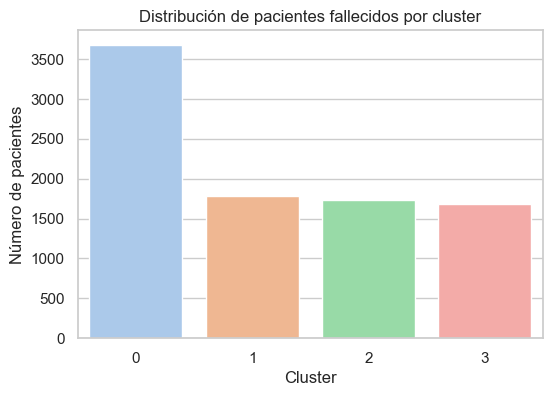

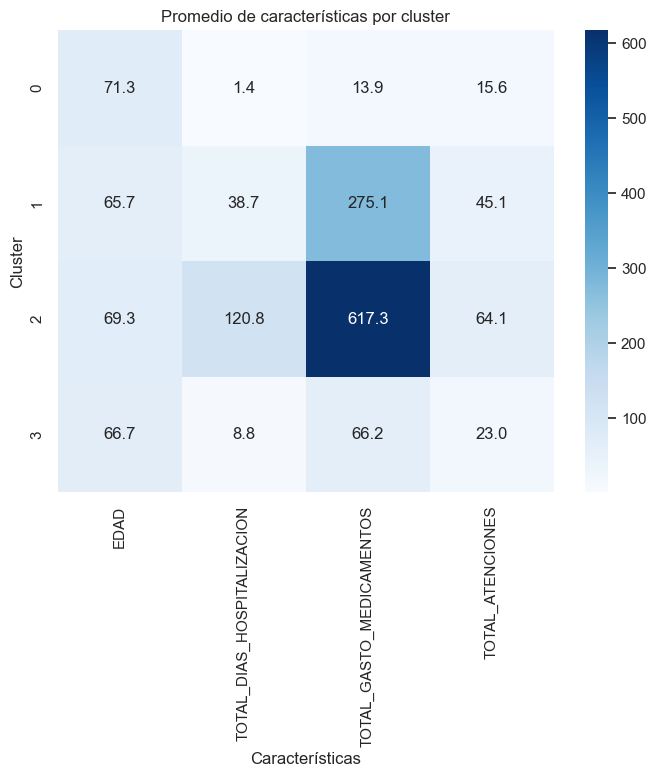

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
sns.set(style="whitegrid")

# ===========================
# 📊 Gráfico de barras: cantidad de pacientes por cluster
# ===========================
cluster_counts = fallecidos_pd["CLUSTER"].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="pastel")
plt.xlabel("Cluster")
plt.ylabel("Número de pacientes")
plt.title("Distribución de pacientes fallecidos por cluster")
plt.show()

# ===========================
# 🔥 Heatmap: promedio de características por cluster
# ===========================
cluster_means = fallecidos_pd.groupby("CLUSTER")[[
    "EDAD",
    "TOTAL_DIAS_HOSPITALIZACION",
    "TOTAL_GASTO_MEDICAMENTOS",
    "TOTAL_ATENCIONES",
]].mean()

plt.figure(figsize=(8,6))
sns.heatmap(cluster_means, annot=True, cmap="Blues", fmt=".1f")
plt.title("Promedio de características por cluster")
plt.ylabel("Cluster")
plt.xlabel("Características")
plt.show()


<Axes: title={'center': 'Distribución de tipos de diabetes entre fallecidos'}, xlabel='TIPO_DIABETES_PRINCIPAL'>

c:\Users\quine\Documents\repos_github\Dataton_CONOVATEC\venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 147 (\x93) missing from font(s) Arial.
  func(*args, **kwargs)
c:\Users\quine\Documents\repos_github\Dataton_CONOVATEC\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


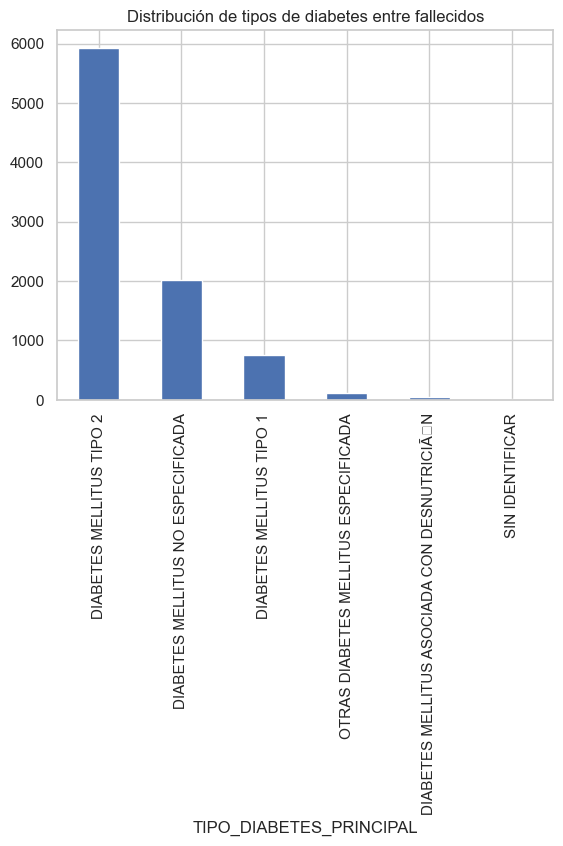

In [96]:
fallecidos_pd["TIPO_DIABETES_PRINCIPAL"].value_counts().plot(kind='bar', title='Distribución de tipos de diabetes entre fallecidos')

---

In [116]:
# Filtrar por DEPARTAMENTO == 'LIMA'
fallecidos_pd = fallecidos_pd[fallecidos_pd["DEPARTAMENTO"] == "LIMA"].copy()


---

## DIABETES MELLITUS TIPO 2

In [117]:

# ===========================
# 📌 Filtrar por tipo de diabetes
# ===========================
tipo_diabetes = "DIABETES MELLITUS TIPO 2"  # <-- Cambia esto por el tipo que te interese
fallecidos_filtrado = fallecidos_pd[fallecidos_pd["TIPO_DIABETES_PRINCIPAL"] == tipo_diabetes]

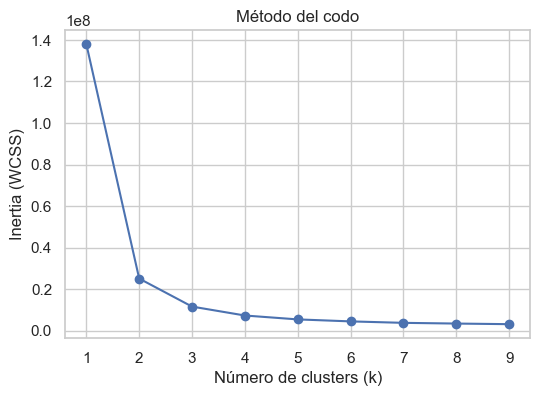

In [118]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = fallecidos_filtrado[[
    "EDAD", "TOTAL_DIAS_HOSPITALIZACION", "TOTAL_GASTO_MEDICAMENTOS", "TOTAL_ATENCIONES"
]]

inertias = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Método del codo')
plt.show()


In [119]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

C:\Users\quine\AppData\Local\Temp\ipykernel_21016\2582233678.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="pastel")


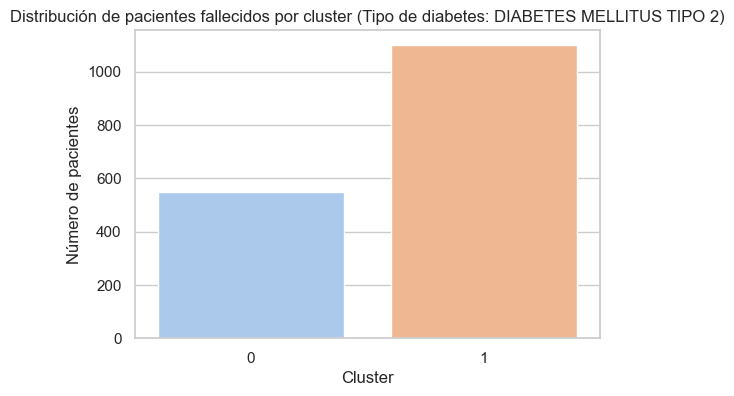

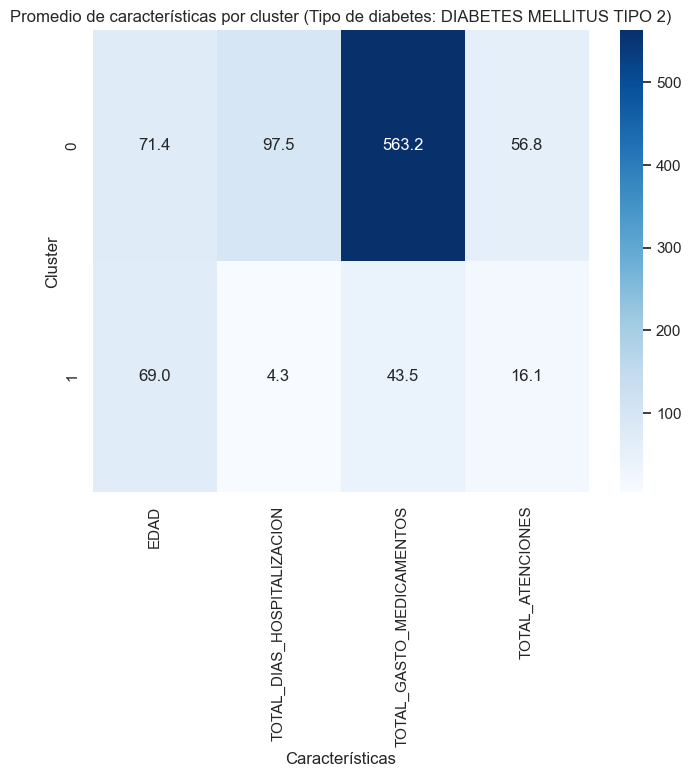

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Configurar estilo
sns.set(style="whitegrid")

# ===========================
# 📌 Filtrar por tipo de diabetes
# ===========================
tipo_diabetes = "DIABETES MELLITUS TIPO 2"  # <-- Change as needed
fallecidos_filtrado = fallecidos_pd[fallecidos_pd["TIPO_DIABETES_PRINCIPAL"] == tipo_diabetes].copy()

# ===========================
# ⚙️ Select and scale features for clustering
# ===========================
features = fallecidos_filtrado[[
    "EDAD",
    "TOTAL_DIAS_HOSPITALIZACION",
    "TOTAL_GASTO_MEDICAMENTOS",
    "TOTAL_ATENCIONES",
]]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# ===========================
# 🤖 Fit KMeans
# ===========================
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster labels to your DataFrame
fallecidos_filtrado["CLUSTER"] = clusters

# ===========================
# 📊 Gráfico de barras: cantidad de pacientes por cluster
# ===========================
cluster_counts = fallecidos_filtrado["CLUSTER"].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="pastel")
plt.xlabel("Cluster")
plt.ylabel("Número de pacientes")
plt.title(f"Distribución de pacientes fallecidos por cluster (Tipo de diabetes: {tipo_diabetes})")
plt.show()

# ===========================
# 🔥 Heatmap: promedio de características por cluster
# ===========================
cluster_means = fallecidos_filtrado.groupby("CLUSTER")[[
    "EDAD",
    "TOTAL_DIAS_HOSPITALIZACION",
    "TOTAL_GASTO_MEDICAMENTOS",
    "TOTAL_ATENCIONES",
]].mean()

plt.figure(figsize=(8,6))
sns.heatmap(cluster_means, annot=True, cmap="Blues", fmt=".1f")
plt.title(f"Promedio de características por cluster (Tipo de diabetes: {tipo_diabetes})")
plt.ylabel("Cluster")
plt.xlabel("Características")
plt.show()


## DIABETES MELLITUS NO ESPECIFICADA

In [121]:

# ===========================
# 📌 Filtrar por tipo de diabetes
# ===========================
tipo_diabetes = "DIABETES MELLITUS NO ESPECIFICADA"  # <-- Cambia esto por el tipo que te interese
fallecidos_filtrado = fallecidos_pd[fallecidos_pd["TIPO_DIABETES_PRINCIPAL"] == tipo_diabetes]

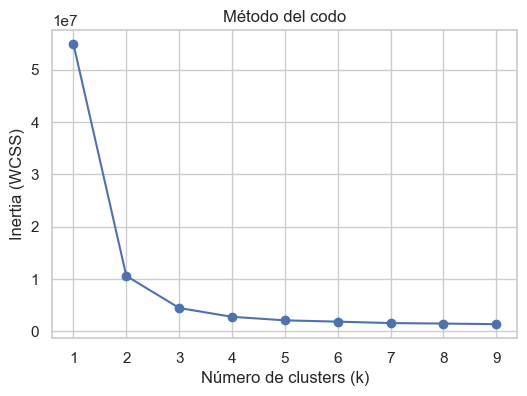

In [122]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = fallecidos_filtrado[[
    "EDAD", "TOTAL_DIAS_HOSPITALIZACION", "TOTAL_GASTO_MEDICAMENTOS", "TOTAL_ATENCIONES"
]]

inertias = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Método del codo')
plt.show()


C:\Users\quine\AppData\Local\Temp\ipykernel_21016\3825743951.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fallecidos_filtrado["CLUSTER"] = clusters
C:\Users\quine\AppData\Local\Temp\ipykernel_21016\3825743951.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="pastel")


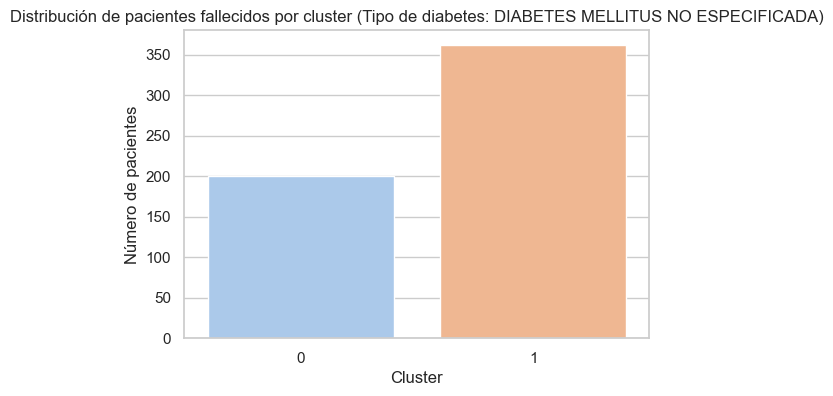

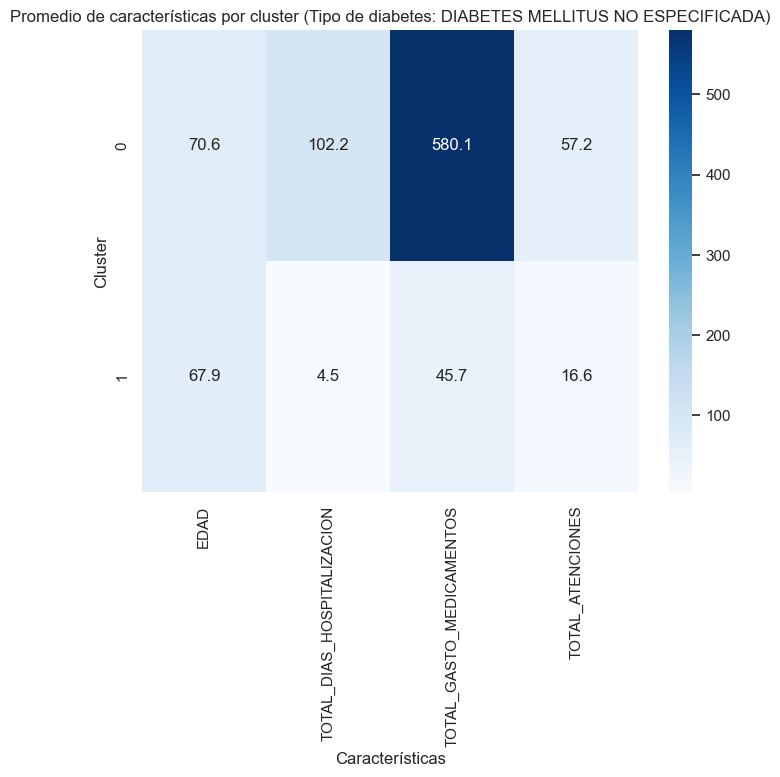

In [123]:
# ===========================
# ⚙️ Select and scale features
# ===========================
features = fallecidos_filtrado[[
    "EDAD",
    "TOTAL_DIAS_HOSPITALIZACION",
    "TOTAL_GASTO_MEDICAMENTOS",
    "TOTAL_ATENCIONES",
]]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# ===========================
# 🤖 KMeans with 2 clusters
# ===========================
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add clusters to DataFrame
fallecidos_filtrado["CLUSTER"] = clusters

# ===========================
# 📊 Gráfico de barras: cantidad de pacientes por cluster
# ===========================
cluster_counts = fallecidos_filtrado["CLUSTER"].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="pastel")
plt.xlabel("Cluster")
plt.ylabel("Número de pacientes")
plt.title(f"Distribución de pacientes fallecidos por cluster (Tipo de diabetes: {tipo_diabetes})")
plt.show()

# ===========================
# 🔥 Heatmap: promedio de características por cluster
# ===========================
cluster_means = fallecidos_filtrado.groupby("CLUSTER")[[
    "EDAD",
    "TOTAL_DIAS_HOSPITALIZACION",
    "TOTAL_GASTO_MEDICAMENTOS",
    "TOTAL_ATENCIONES",
]].mean()

plt.figure(figsize=(8,6))
sns.heatmap(cluster_means, annot=True, cmap="Blues", fmt=".1f")
plt.title(f"Promedio de características por cluster (Tipo de diabetes: {tipo_diabetes})")
plt.ylabel("Cluster")
plt.xlabel("Características")
plt.show()

## DIABETES MELLITUS TIPO 1

In [124]:
# ===========================
# 📌 Filtrar por tipo de diabetes
# ===========================
tipo_diabetes = "DIABETES MELLITUS TIPO 1"  # <-- Cambia esto por el tipo que te interese
fallecidos_filtrado = fallecidos_pd[fallecidos_pd["TIPO_DIABETES_PRINCIPAL"] == tipo_diabetes]

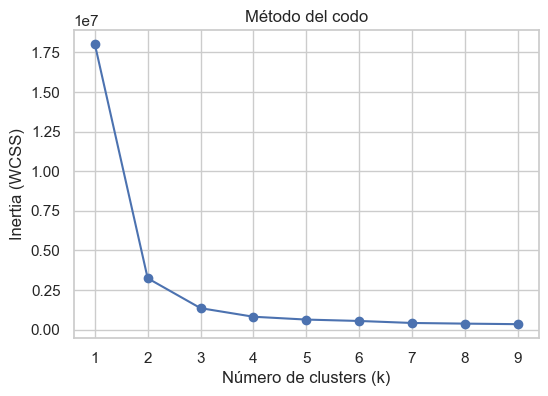

In [125]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = fallecidos_filtrado[[
    "EDAD", "TOTAL_DIAS_HOSPITALIZACION", "TOTAL_GASTO_MEDICAMENTOS", "TOTAL_ATENCIONES"
]]

inertias = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Método del codo')
plt.show()


C:\Users\quine\AppData\Local\Temp\ipykernel_21016\1062010929.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fallecidos_filtrado["CLUSTER"] = clusters
C:\Users\quine\AppData\Local\Temp\ipykernel_21016\1062010929.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="pastel")


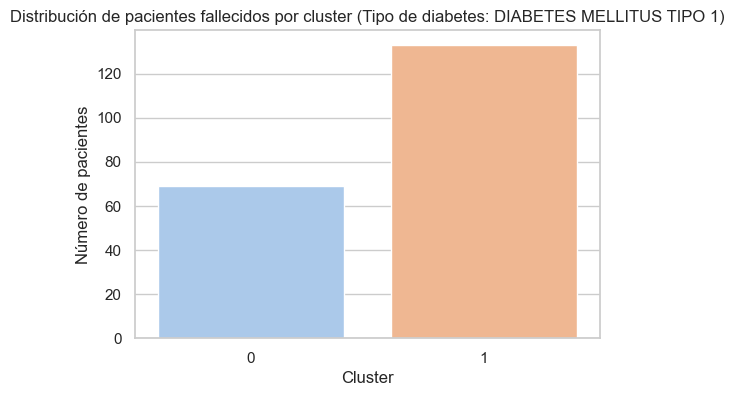

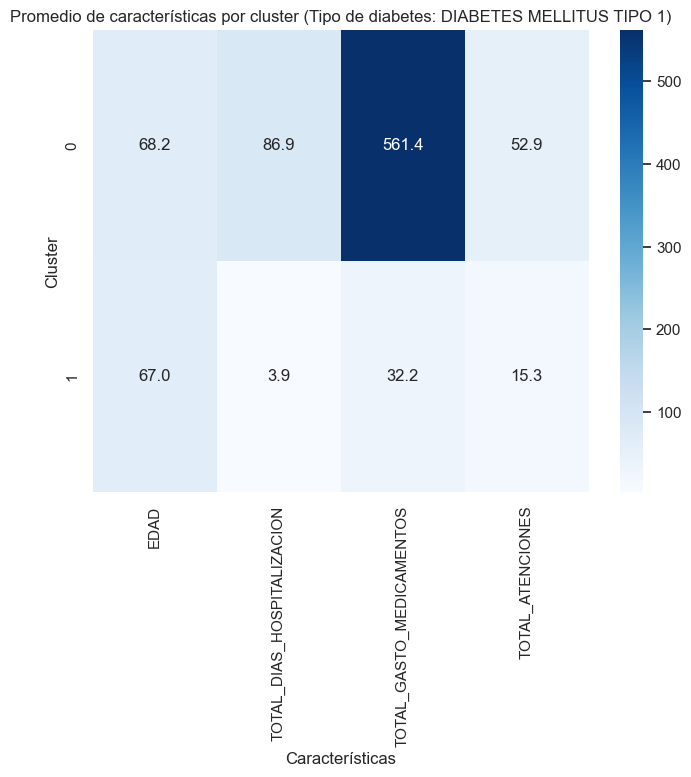

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Configurar estilo
sns.set(style="whitegrid")


# ===========================
# ⚙️ Seleccionar y escalar variables
# ===========================
features = fallecidos_filtrado[[
    "EDAD",
    "TOTAL_DIAS_HOSPITALIZACION",
    "TOTAL_GASTO_MEDICAMENTOS",
    "TOTAL_ATENCIONES",
]]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# ===========================
# 🤖 KMeans con 2 clusters
# ===========================
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Añadir columna de cluster al DataFrame
fallecidos_filtrado["CLUSTER"] = clusters

# ===========================
# 📊 Gráfico de barras: cantidad de pacientes por cluster
# ===========================
cluster_counts = fallecidos_filtrado["CLUSTER"].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="pastel")
plt.xlabel("Cluster")
plt.ylabel("Número de pacientes")
plt.title(f"Distribución de pacientes fallecidos por cluster (Tipo de diabetes: {tipo_diabetes})")
plt.show()

# ===========================
# 🔥 Heatmap: promedio de características por cluster
# ===========================
cluster_means = fallecidos_filtrado.groupby("CLUSTER")[[
    "EDAD",
    "TOTAL_DIAS_HOSPITALIZACION",
    "TOTAL_GASTO_MEDICAMENTOS",
    "TOTAL_ATENCIONES",
]].mean()

plt.figure(figsize=(8,6))
sns.heatmap(cluster_means, annot=True, cmap="Blues", fmt=".1f")
plt.title(f"Promedio de características por cluster (Tipo de diabetes: {tipo_diabetes})")
plt.ylabel("Cluster")
plt.xlabel("Características")
plt.show()
